# Exploretory data analysis on risk factors involved in investment by Deutch Bank

## Background
Deutsche Bank is a multinational investment bank and financial services company. It offers a range of investment products to its clients, including stocks, bonds, and derivatives. The bank is concerned about the risk of investment in various products and wants to use data analysis to identify and manage potential risks.

## Objective

To perform data analysis on the investment products offered by Deutsche Bank and identify potential risks associated with each product.

Technical chart for the reliance industries: 

1. MACD
2. Momentum (MOM)
3. Stochastic (STO)
4. CCI

<img src="TCS.png" width=750 height=400 />

## Technical analysis tool

With this dataset, we could perform a wide range of analyses and visualizations to understand how the stock price has changed over time, and to identify trends or patterns in the data. So, I will start with few basic things with these datas over time and compare them with each other.

1. **Calculate returns:** 
We can use pandas to calculate the daily returns of the stock, which can be useful for analysis and modeling:

    ```
    # calculate daily returns
    df['Return'] = df['Close'].pct_change()
    # plot the returns over time
    plt.plot(df['Date'], df['Return'])
    plt.title('Deutsche Bank Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.show()
    ```

    `pct_change()` is a pandas function that calculates the percentage change between the current and a prior element. It is often used to calculate the daily or periodical returns of a financial asset.

    The formula used to calculate the percentage change for a given time period is:

$\text{Percentage change for a given period of time} = \frac{(\text{current price} - \text{prior price})}{\text{prior price}} \times 100$

    where "current price" is the price at the current time period, and "prior price" is the price at the previous time period.

2. **Analyze relationships between variables:** You can use seaborn to create scatter plots and regression plots to explore the relationships between variables. For example, to create a scatter plot of the opening price vs. the closing price:

```
# create a scatter plot of Open vs. Close
sns.scatterplot(data=df, x='Open', y='Close')
plt.title('Deutsche Bank Open vs. Close')
plt.show()
```

3. **Compare with market indices:** You can use pandas to download and compare the Deutsche Bank share data with market indices such as the DAX, FTSE, or S&P 500. 

4. **Rolling statistics:** 

    Rolling statistics are a way to calculate summary statistics on a rolling window of data over a time series or other ordered data. Rolling statistics can help smooth out fluctuations and identify trends in the data. Here are some common rolling statistics:

- **Rolling Mean:** The rolling mean, also known as moving average, calculates the average of a rolling window of values. This is a common technique to smooth out fluctuations and identify trends in the data.

    _The rolling mean or moving average is a statistical measure that calculates the mean value of a series of data points over a specified period of time. In other words, it calculates the average of a rolling window of values._ 

    Mathematically, the rolling mean for a time series or other ordered data can be calculated as follows:

    $\mu_t = \text{(rolling mean)}_t = \frac{x[t-1] + x[t-2] + ... + x[t-n]}{n}$

    where `x` is the time series or ordered data, `t` is the current time period, and `n` is the window size or the number of data points included in the rolling window. The rolling mean at time `t` is calculated by taking the average of the `n` data points preceding `t`.

    The rolling mean is a common technique to smooth out fluctuations and identify trends in the data. By averaging out the noise and short-term fluctuations in the data, the rolling mean can help highlight longer-term patterns and trends. The choice of window size n determines the degree of smoothing: a larger window size will result in a smoother, slower-moving trend, while a smaller window size will result in a more volatile, faster-moving trend.

    Overall, the rolling mean is a useful tool for analyzing time series data, particularly when the data is noisy or exhibits short-term fluctuations. It can help identify trends, highlight patterns, and provide a clearer picture of the underlying data.

- **Rolling Standard Deviation:** The rolling standard deviation calculates the standard deviation of a rolling window of values. This can help identify periods of high or low volatility in the data.

    The rolling standard deviation is a statistical measure that calculates the standard deviation of a series of data points over a specified period of time. In other words, it calculates the standard deviation of a rolling window of values.

    Mathematically, the rolling standard deviation for a time series or other ordered data can be calculated as follows:

    $\sigma_t = \text{(rolling std)}_t = \sqrt{\frac{(x[t-1] - \mu_t)^2 + (x[t-2] - \mu_t)^2 + ... + (x[t-n] - \mu_t)^2}{n-1}}$

- **Rolling Correlation:** The rolling correlation is a statistical measure that calculates the correlation between two time series over a specified period of time. In other words, it calculates the correlation between a rolling window of values for each of the two time series.

    Mathematically, the rolling correlation for two time series or other ordered data can be calculated as follows:

    $\text{(rolling corr)}_t = \frac{\sum((x[t-i] - (\mu_x)_t) \times (y[t-i] - (\mu_y)_t)~ \text{for}~ i~ \text{in range}(n))}{(n-1) \times (\sigma_x)_t \times (\sigma_y)_t}$

    **Python code snippet:**
    ```
    import pandas as pd
    import numpy as np
    # Load data into a DataFrame
    data = pd.read_csv('stock_data.csv', index_col='Date')
    # Calculate the rolling mean and standard deviation
    rolling_mean = data['Close'].rolling(window=20).mean()
    rolling_std = data['Close'].rolling(window=20).std()
    # Combine the rolling statistics into a single DataFrame
    rolling_stats = pd.DataFrame({'Rolling Mean': rolling_mean, 'Rolling Std': rolling_std})
    # Print the last 10 rows of the DataFrame
    print(rolling_stats.tail(10))
    ```

    This code assumes that you have loaded data into a CSV file named stock_data.csv, with columns for 'Date', 'Open', 'High', 'Low', and 'Close'. The index_col argument is used to specify that the 'Date' column should be used as the index of the DataFrame.

    The code then uses the rolling method to calculate the rolling mean and standard deviation of the closing prices over a window of 20 days. The window argument is used to specify the size of the rolling window.

> **Correlation:** The correlation coefficient that indicates the strength of the relationship between two variables, `x`, `y` can be found using the following formula:
> $r_{xy}= \frac{\sum_i (x_i-\mu_x)(y_i-\mu_y)}{\sqrt{\sum_i (x_i-\mu_x)^2}\sum_i(y_i-\mu_y)^2}$.
> where 
> - $r_{xy}$ - the correlation coefficient of the linear relationship between the variables x and y
> - $x_i$ – the values of the x-variable in a sample
> - $\mu_x$ – the mean of the values of the x-variable
> - $y_i$ – the values of the y-variable in a sample
> - $\mu_y$ – the mean of the values of the y-variable.

5. **Moving average convergence divergence (MACD):** 

    MACD stands for Moving Average Convergence Divergence (MACD, or MAC-D) , which is a technical indicator used in finance to analyze stock price trends and momentum. 
    It is a trend-following momentum indicator that shows the relationship between two exponential moving averages (EMAs) of a security’s price. The MACD line is calculated by subtracting the 26-period EMA from the 12-period EMA. The result is plotted on a graph, and a 9-day EMA of the MACD is also plotted as a "Signal Line".

    The result of that calculation is the MACD line. A nine-day EMA of the MACD line is called the signal line, which is then plotted on top of the MACD line, which can function as a trigger for buy or sell signals. Traders may buy the security when the MACD line crosses above the signal line and sell—or short—the security when the MACD line crosses below the signal line. MACD indicators can be interpreted in several ways, but the more common methods are crossovers, divergences, and rapid rises/falls.

    The formula to calculate the Moving Average Convergence Divergence (MACD) is as follows:

    `MACD Line = 12-day Exponential Moving Average (EMA) of Closing Prices - 26-day EMA of Closing Prices`

    - Signal Line = 9-day EMA of MACD Line
    - MACD Histogram = MACD Line - Signal Line

    In this formula, the MACD Line is calculated by subtracting the 26-day EMA of the closing prices from the 12-day EMA of the closing prices. The Signal Line is then calculated by taking the 9-day EMA of the MACD Line. Finally, the MACD Histogram is calculated by subtracting the Signal Line from the MACD Line.

    **Key features:**
    1. MACD is best used with daily periods, where the traditional settings of 26/12/9 days is the norm.
    2. MACD triggers technical signals when the MACD line crosses above the signal line (to buy) or falls below it (to sell).
    3. MACD can help gauge whether a security is overbought or oversold, alerting traders to the strength of a directional move, and warning of a potential price reversal.
    4. MACD can also alert investors to bullish/bearish divergences (e.g., when a new high in price is not confirmed by a new high in MACD, and vice versa), suggesting a potential failure and reversal.
    5. After a signal line crossover, it is recommended to wait for three or four days to confirm that it is not a false move.

    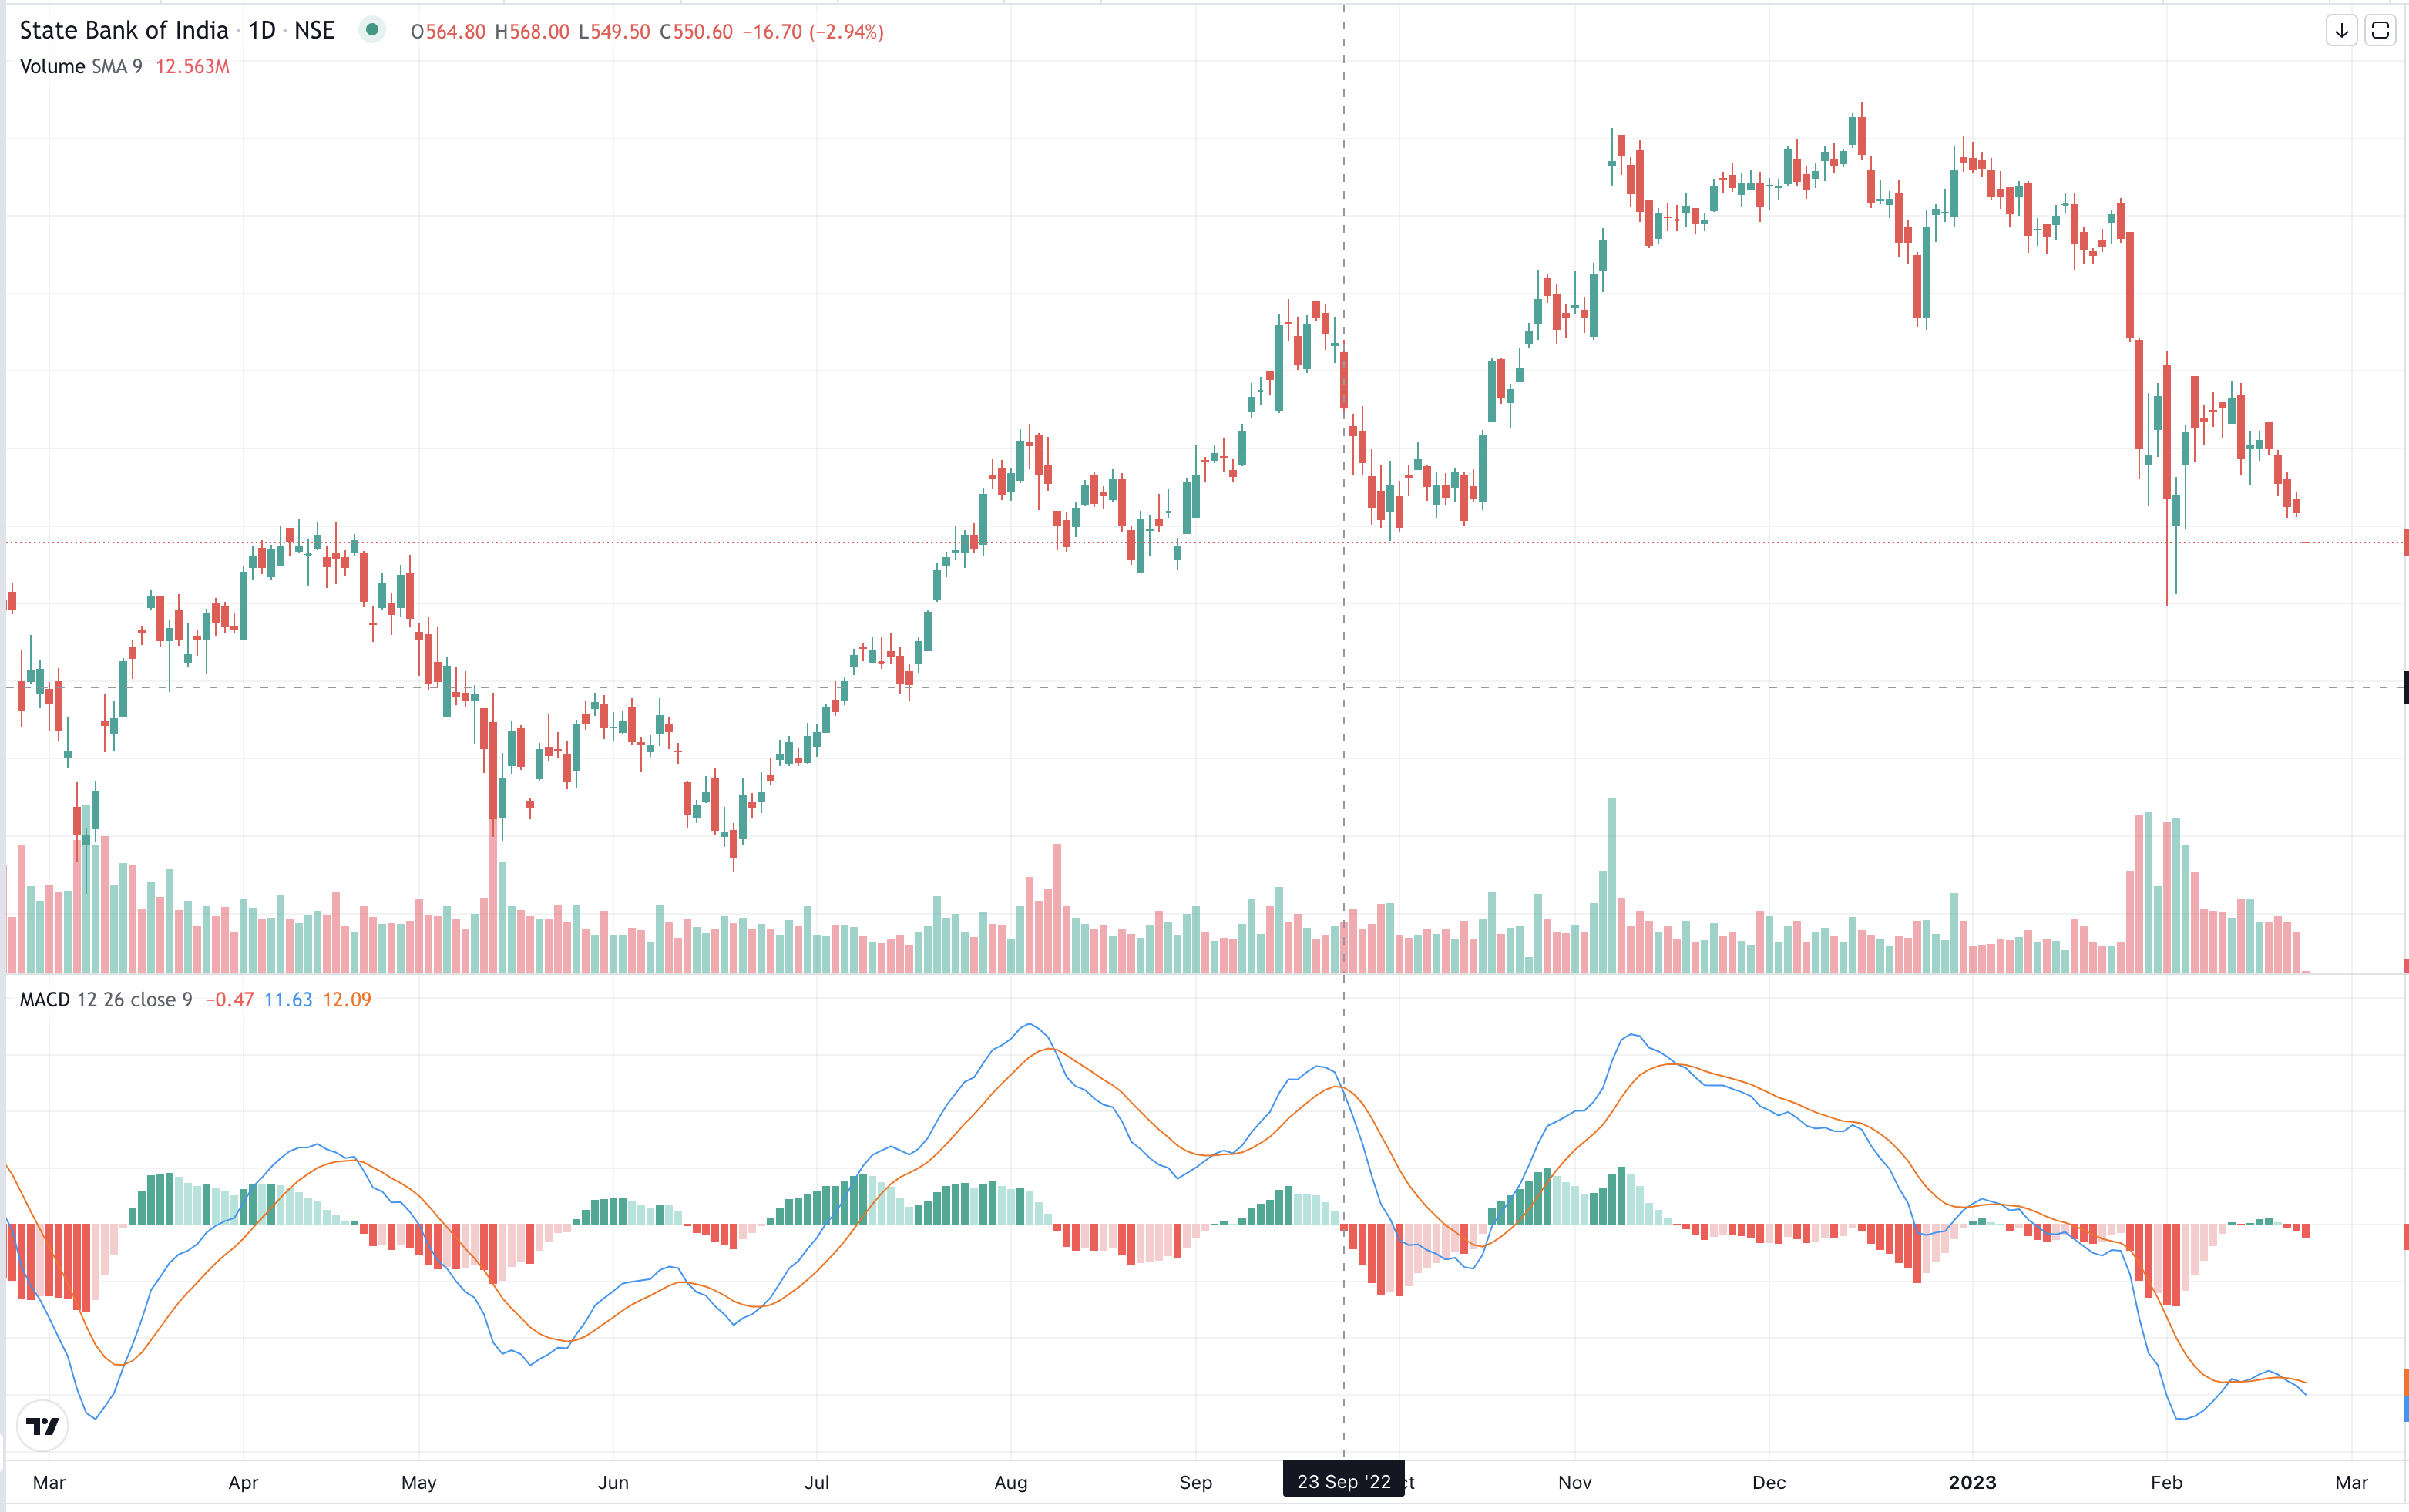
    
    (Blue: MACD, Red: Signal)

    MACD is often displayed with a histogram (see the chart above) that graphs the distance between MACD and its signal line. If MACD is above the signal line, the histogram will be above the MACD’s baseline, or zero line. If MACD is below its signal line, the histogram will be below the MACD’s baseline. Traders use the MACD’s histogram to identify when bullish or bearish momentum is high—and possibly overbought/oversold.

| Relative Strength (RSI) index | MACD |
|-------------------------------|------|
| The relative strength index (RSI) aims to signal whether a market is considered to be overbought or oversold in relation to recent price levels. The RSI is an oscillator that calculates average price gains and losses over a given period of time. The default time period is 14 periods with values bounded from 0 to 100. A reading above 70 suggests an overbought condition, while a reading below 30 is considered oversold, with both potentially signaling a top is forming, or vice versa (a bottom is forming). | The MACD lines, however, do not have concrete overbought/oversold levels like the RSI and other oscillator studies. Rather, they function on a relative basis. That’s to say an investor or trader should focus on the level and direction of the MACD/signal lines compared with preceding price movements in the security at hand, as shown below. |

> **NOTE:**
> In the stock market, the terms "bullish" and "bearish" are used to describe the general sentiment or outlook of investors towards a particular stock, market, or the overall economy.

> 1.  A bullish market or stock means that investors are optimistic and confident about its prospects and believe that the stock or market is likely to rise in value. In a bullish market, investors may be buying more stocks, and there is generally more demand than supply for shares, which drives the prices higher.

> 2. A bearish market or stock means that investors are pessimistic and uncertain about its prospects and believe that the stock or market is likely to fall in value. In a bearish market, investors may be selling more stocks, and there is generally more supply than demand for shares, which drives the prices lower.

> There are several factors that can cause a market or stock to become bullish or bearish, including economic indicators such as interest rates, inflation, and GDP growth, as well as company-specific factors such as earnings reports, management changes, and industry trends.

> It's important to note that a bullish or bearish sentiment is not a guarantee of future performance, and stock prices can be affected by a wide range of factors. As a result, investors should conduct their own research and analysis before making any investment decisions.

**Python code snippet:**

```
import pandas as pd
import numpy as np
# Load historical price data into a DataFrame
data = pd.read_csv('stock_data.csv')
# Calculate the 12-day and 26-day exponential moving averages (EMAs)
ema12 = data['Close'].ewm(span=12).mean()
ema26 = data['Close'].ewm(span=26).mean()
# Calculate the MACD line
macd_line = ema12 - ema26
# Calculate the 9-day EMA of the MACD line (signal line)
signal_line = macd_line.ewm(span=9).mean()
# Calculate the MACD histogram
macd_histogram = macd_line - signal_line
# Combine the MACD values into a single DataFrame
macd_dataframe = pd.DataFrame({'MACD Line': macd_line, 'Signal Line': signal_line, 'MACD Histogram': macd_histogram})
# Print the last 10 rows of the DataFrame
print(macd_dataframe.tail(10))
```

This code assumes that you have loaded historical price data into a CSV file named stock_data.csv, with columns for 'Date', 'Open', 'High', 'Low', and 'Close'.

The code first calculates the 12-day and 26-day exponential moving averages (EMAs) of the closing prices using the ewm method of the DataFrame.

The code then calculates the MACD line by subtracting the 26-day EMA from the 12-day EMA.

Next, the code calculates the 9-day EMA of the MACD line to generate the signal line.

Finally, the code calculates the MACD histogram by subtracting the signal line from the MACD line.

The code combines the MACD line, signal line, and MACD histogram values into a single DataFrame named macd_dataframe and prints the last 10 rows of the DataFrame to verify that the calculation is correct.

You can adjust the parameters, such as the periods of the EMAs or the signal line, to suit your needs.

Reference: [Moving average convergence divergence](https://www.investopedia.com/terms/m/macd.asp#:~:text=Moving%20average%20convergence%2Fdivergence)


**Note:** What are Exponential Moving Average (EMA)?
An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points. The exponential moving average is also referred to as the exponentially weighted moving average. An exponentially weighted moving average reacts more significantly to recent price changes than a simple moving average simple moving average (SMA), which applies an equal weight to all observations in the period.

Formula:

$\text{EMA}_{\rm today}= \left(\text{Value}_\text{today}\times \left(\frac{\text{Smoothing}}{1+\text{Days}}\right)\right) + \text{EMA}_{\rm yesterday}\times \left(1-\left(\frac{\text{Smoothing}}{1+\text{Days}}\right) \right)$

where

- EMA = Exponential moving average

while there are many possible choices for the smoothing factor, the most common choice is 2, i.e. 

- smoothing= 2

that gives the most recent observation more weight. If the smoothing factor is increased, more recent observations have more influence on the EMA.

6. **Bollinger Bands:** 

    Bollinger Bands are a kind of trading envelope. They are lines plotted at an interval around a moving average. Bollinger Bands consist of a moving average and two standard deviations charted as one line above and one line below the moving average. The line above is two standard deviations added to the moving average. The line below is two standard deviations subtracted from the moving average. Traders generally use them to determine overbought and oversold zones, to confirm divergences between prices and indicators, and to project price targets. The wider the bands are, the greater the volatility is. The narrower the bands are, the lesser the volatility is. The moving average is calculated on the close.

    > **PARAMETERS:** Period & Standard deviation

    - Upper Band= moving average + $2\sigma$
    - Middle Band =  moving average
    - Lower Band = moving average - $2\sigma$

    We can use pandas to calculate Bollinger Bands, another popular technical indicator used in trading.
    
        **Python code snippet:**
        ```
        import pandas as pd
        import numpy as np
        # Load historical price data into a DataFrame
        data = pd.read_csv('stock_data.csv')
        # Calculate the 20-day simple moving average
        sma20 = data['Close'].rolling(window=20).mean()
        # Calculate the standard deviation of the closing prices
        std_dev = data['Close'].rolling(window=20).std()
        # Calculate the upper and lower Bollinger Bands
        upper_band = sma20 + 2 * std_dev
        lower_band = sma20 - 2 * std_dev
        # Combine the Bollinger Bands values into a single DataFrame
        bbands_dataframe = pd.DataFrame({'Upper Band': upper_band, 'Lower Band': lower_band})
        # Print the last 10 rows of the DataFrame
        print(bbands_dataframe.tail(10))
        ```
        This code assumes that you have loaded historical price data into a CSV file named stock_data.csv, with columns for 'Date', 'Open', 'High', 'Low', and 'Close'.

7. **Commodity Channel Index (CCI):**
    The Commodity Channel Index, CCI, is designed to detect beginning and ending market trends. The computational procedure standardizes market prices much like a standard score in statistics. The final index attempts to measure the deviation from normal or major changes in the market's trend.

    According to the original author, 70% to 80% of all price fluctuations fall within +100 and -100 as measured by the index. A thorough discussion of the Commodity Channel Index can be found in the October 1980 edition of Commodities magazine (now Futures).

    The trading rules for the CCI are as follows. Establish a long position when the CCI exceeds +100. Liquidate when the index drops below +100. For a short position, you use the -100 value as your reference point. Any value less than -100, e.g. -125, suggests a short position, while a rise to -85 tells you to liquidate your short position.
    
    > **PARAMETERS:** Period (20) - the number of bars, or period, used to calculate the study.

    The proper calculation of the CCI requires several steps. They are listed in the proper sequence below. Typical prices, using the high, low and close prices for the interval must be calculated. It is the simple arthimetic avergae of the three values. 

    **Step-1:** First we need to calculate-

    `TP=(Hight+Low+Closed)/3`

    - TPt represents the typical price.
    - Hightt is the highest price for this interval
    - Lowt is the lowest price for the interval
    - Closet is the closing price for this interval.

    **Step-2:** Next we need to find MDt-

    `TPAVGt = (TP1+TP2+.....+TPn)/n`

    - TPAVGt is the moving average of the typical price.
    - TPn is the typical price for the nth interval.
    - n is the number of intervals for the average.

    **Step-3:** Next one is to find mean deviation. The formula is 

    `MDt= (|TP1-TPAVG1|+ ......+ |TPn- TPAVGn|)/n`

    - MDt is the mean deviation for this interval
    - TPn is the typical price for the nth interval
    - TPAVGn is the moving avergae of the typical price for the nth interval
    - n is the number of intervals.

    The symbol `||` designetes absolute value. In mathematical terms, negative differences are treated as positive values. 
    
    **Step-4:** Now, the computation for the final CCI value is-

    `CCIt = (TPt-TPAVGt)/(0.015*MDT)`

    - CCIt is the commodity channel index for the current period.
    - TPt is the typical price for the current period.
    - TPAVGt is the moving avergae of the typical price.
    - 0.015 is the constant
    - MDT is the mean deviation for the period.

    **Python code snippet:** A python code to calculate CCI for a data set 'stock_data.csv' is as follows:

    ```
    # Load historical price data into a DataFrame
    data = pd.read_csv('stock_data.csv')
    # Calculate typical price
    typical_price = (data['High'] + data['Low'] + data['Close']) / 3
    # Calculate the 20-day simple moving average of typical price
    sma20 = typical_price.rolling(window=20).mean()
    # Calculate the mean deviation
    mean_deviation = abs(typical_price - sma20).rolling(window=20).mean()
    # Calculate the CCI
    cci = (typical_price - sma20) / (0.015 * mean_deviation)
    # Combine the CCI values into a single DataFrame
    cci_dataframe = pd.DataFrame({'CCI': cci})
    # Print the last 10 rows of the DataFrame
    print(cci_dataframe.tail(10))
    ```
    This code assumes that you have loaded historical price data into a CSV file named stock_data.csv, with columns for 'Date', 'Open', 'High', 'Low', and 'Close'.

8. **Momentum (MOM):**

    Momentum is a technical analysis tool used by traders and investors to measure the rate of change in the price of a financial asset. It helps to identify the strength and direction of a trend by comparing the current price to the price from a specified number of periods ago.

    Momentum monitors the change in prices. It tells you whether prices are increasing at an increasing rate or decreasing at a decreasing rate. 

    - Is the market trend about to change? 
    - Is the market overbought or oversold? 

    Momentum may help us to find those market conditions.

    **Formula:** Momentum is calculated using a simple formula:

    `Momentum = Current Price - Price n periods ago`

    Where `n` represents the number of periods, which could be days, weeks, or months, depending on the timeframe being analyzed.

    Momentum can be calculated by computing the continuous difference between prices at fixed intervals. That difference is either a positive or negative value. 
    - When momentum is above the zero line and rising, prices are increasing at an increasing rate. 
    - If momentum is above the zero line but is declining, prices are still increasing but at a decreasing rate.

    The opposite is true when momentum falls below the zero line. 
    - If momentum is falling and is below the zero line, prices are decreasing at an increasing rate. 
    - With momentum below the zero line and rising, prices are still declining but at a decreasing rate.

    Traders use momentum to identify potential trend reversals, as well as to confirm the strength of an existing trend. When momentum is positive and rising, it suggests that the price is likely to continue to increase. Conversely, when momentum is negative and falling, it suggests that the price is likely to continue to decrease.

    Momentum can also be used in conjunction with other technical indicators, such as moving averages, to generate buy and sell signals. For example, a trader may look for a crossover of the moving average and momentum lines as a signal to enter or exit a position.

    It's important to note that momentum is just one tool among many used in technical analysis and should not be relied upon solely to make trading decisions. It's essential to consider other factors, such as fundamental analysis, market conditions, and risk management, before making any investment decisions.

    **Python code snippet:**
    ```
    import pandas as pd
    # Load historical price data into a DataFrame
    data = pd.read_csv('stock_data.csv')
    # Calculate the price difference over the past 10 periods
    mom = data['Close'] - data['Close'].shift(10)
    # Combine the MOM values into a single DataFrame
    momentum = pd.DataFrame({'MOM': mom})
    # Print the last 10 rows of the DataFrame
    print(momentum.tail(10))
    ```

    This code assumes that you have loaded historical price data into a CSV file named stock_data.csv, with columns for 'Date', 'Open', 'High', 'Low', and 'Close'.

9. **Stochastic (STO):**

    Stochastic (STO) is a popular technical indicator used by traders to identify potential trend reversals and overbought or oversold conditions in the market. It measures the relationship between a security's closing price and its price range over a specified period, typically 14 days.

    The Stochastic oscillator consists of two lines: 
    - the `%K` line and 
    - the `%D` line. 
    
    The `%K` line represents the current price's position relative to the highest and lowest prices over a specified period, while the `%D` line is a moving average of the `%K` line.

    The mathematical formulas to calculate the Stochastic oscillator are as follows:

    $\%K = \frac{C- L14}{H14-L14}\times 100$

    where

    - C = The most recent closing price
    - L14 = The lowest price traded of the 14 previous trading sessions
    - H14 = The highest price traded during the same 14-day period
    - %K = The current value of the stochastic indicator

    
    $\%D = 3~\text{-day SMA of}~ \%K$

    Where:
    - `3-day SMA`: the simple moving average of the %K line over the past three periods
    
    Notably, %K is referred to sometimes as the fast stochastic indicator. The "slow" stochastic indicator is taken as %D = 3-period moving average of %K. 

    >  **3-day SMA:** A 3-day SMA is a simple moving average that is calculated by adding up the closing prices of an asset over the past three trading days and dividing the sum by three.
    
    The resulting values for `%K` and `%D` will range from 0 to 100, with higher values indicating overbought conditions and lower values indicating oversold conditions. Typically, when the %K line crosses above the `%D` line, it is considered a bullish signal, while a bearish signal is generated when the `%K` line crosses below the `%D` line.

    Traders may also use the Stochastic oscillator in conjunction with other technical indicators, such as trendlines or moving averages, to confirm potential signals or filter out false ones.

    It's important to note that no single technical indicator can provide perfect trading signals, and traders should always consider multiple factors, including fundamental analysis, market conditions, and risk management, before making any trading decisions.

| RSI | STO |
|-----|-----|
| The RSI is a momentum oscillator that measures the magnitude of recent price changes to evaluate whether a stock is overbought or oversold. The RSI compares the average gains of the stock's price during a given period (usually 14 days) to the average losses during the same period. The RSI is expressed as a value between 0 and 100, and a reading above 70 is typically considered overbought, while a reading below 30 is typically considered oversold. | The STO, on the other hand, is a momentum indicator that compares a stock's closing price to its price range over a given period. The STO consists of two lines, %K and %D, which are both expressed as values between 0 and 100. The %K line measures the current price in relation to the highest and lowest prices over a given period, while the %D line is a moving average of the %K line. When the %K line crosses above the %D line, it is seen as a bullish signal, indicating that the stock may be about to rise, and vice versa. |

    **Python codes:** 
    ```
    import pandas as pd
    # Load historical price data into a DataFrame
    data = pd.read_csv('stock_data.csv')
    # Calculate the highest high and lowest low over the past 14 periods
    high14 = data['High'].rolling(14).max()
    low14 = data['Low'].rolling(14).min()
    # Calculate the %K line
    k = 100 * ((data['Close'] - low14) / (high14 - low14))
    # Calculate the 3-day simple moving average of %K to get %D line
    d = k.rolling(3).mean()
    # Combine %K and %D into a single DataFrame
    stochastic = pd.DataFrame({'%K': k, '%D': d})
    # Print the last 10 rows of the DataFrame
    print(stochastic.tail(10))
    ```

    This code assumes that you have loaded historical price data into a CSV file named stock_data.csv, with columns for 'Date', 'Open', 'High', 'Low', and 'Close'.

10. **Correlation:** Correlation is a statistical measure that describes the degree of linear relationship between two variables. It is a measure of the strength and direction of the relationship between two variables.

    The formula to calculate the correlation coefficient (r) between two variables X and Y is as follows:

    $r = \frac{n \sum XY - \sum X \sum Y}{\sqrt{(nΣX^2 - (ΣX)^2)(nΣY^2 - (ΣY)^2)}}$

    where:

    - `ΣXY` is the sum of the products of the corresponding values of `X` and `Y`
    - `ΣX` and `ΣY` are the sums of the values of `X` and `Y`, respectively
    - `ΣX^2` and `ΣY^2` are the sums of the squares of the values of `X` and `Y`, respectively

    `n` is the number of data points

    The correlation coefficient `r` is a value between `-1` and `1`, where 
    - `-1` indicates a perfect negative correlation (i.e., as X increases, Y decreases), 
    - `0` indicates no correlation, and 
    - `1` indicates a perfect positive correlation (i.e., as X increases, Y also increases).

    It is important to note that correlation does not necessarily imply causation - just because two variables are correlated does not mean that one causes the other. Correlation is simply a measure of the strength of the relationship between the two variables.

    **Python code to calculate correlation:**

    ```
    import pandas as pd
    # Load data into a DataFrame
    data = pd.read_csv('data.csv')
    # Calculate the correlation between two columns
    corr = data['Column1'].corr(data['Column2'])
    # Print the correlation coefficient
    print('Correlation coefficient:', corr)
    ```

    In this code, replace 'Column1' and 'Column2' with the names of the columns for which you want to calculate the correlation coefficient. The corr() function calculates the Pearson correlation coefficient, which is a measure of the linear relationship between two variables. It returns a value between -1 and 1, where -1 indicates a perfectly negative correlation, 0 indicates no correlation, and 1 indicates a perfectly positive correlation.

    **Correlation Matrix:**

    We can also calculate the correlation matrix for a DataFrame by calling the corr() method on the DataFrame. This will return a matrix of all pairwise correlations between the columns in the DataFrame. Here's an example:

    ```
    import pandas as pd
    # Load data into a DataFrame
    data = pd.read_csv('data.csv')
    # Calculate the correlation matrix
    corr_matrix = data.corr()
    # Print the correlation matrix
    print(corr_matrix)
    ```

    This will print a matrix where each entry is the correlation coefficient between two columns in the DataFrame. The diagonal of the matrix will always be 1, since each column is perfectly correlated with itself.

### Multiple datasets and compartive study
If you have data for three more companies with the same data structure as the Deutsche Bank share data, there are many things you can do with pandas and other Python libraries. Here are some ideas:

1. **Merge the data:** You can use pandas to merge the data for all four companies into a single DataFrame, allowing you to analyze and compare the data more easily. For example, to merge the Deutsche Bank, Apple, Microsoft, and Amazon data into a single DataFrame:

    ```
    # read in the data for all four companies
    db = pd.read_csv('deutsche_bank.csv')
    apple = pd.read_csv('apple.csv')
    microsoft = pd.read_csv('microsoft.csv')
    amazon = pd.read_csv('amazon.csv')
    # merge the data for all four companies on the 'Date' column
    merged_data = pd.merge(db, apple, on='Date', suffixes=('_db', '_apple'))
    merged_data = pd.merge(merged_data, microsoft, on='Date', suffixes=('_db', '_msft'))
    merged_data = pd.merge(merged_data, amazon, on='Date', suffixes=('_db', '_amzn'))
    ```
2. **Visualize the data:** You can use matplotlib or seaborn to create visualizations of the data for each company and compare them. For example, to plot the closing price of each company over time:

    ```
    # plot the closing price for each company over time
    plt.plot(db['Date'], db['Close'], label='Deutsche Bank')
    plt.plot(apple['Date'], apple['Close'], label='Apple')
    plt.plot(microsoft['Date'], microsoft['Close'], label='Microsoft')
    plt.plot(amazon['Date'], amazon['Close'], label='Amazon')
    plt.title('Closing Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()
    ```

3. **Calculate summary statistics:** You can use pandas to calculate summary statistics for each company, such as the mean, standard deviation, and correlation coefficient. For example, to calculate the mean closing price and volume for each company:

    ```
    # calculate mean closing price and volume for each company
    mean_close = merged_data[['Close_db', 'Close_apple', 'Close_msft', 'Close_amzn']].mean()
    mean_volume = merged_data[['Volume_db', 'Volume_apple', 'Volume_msft', 'Volume_amzn']].mean()

    print('Mean closing price:')
    print(mean_close)
    print('Mean volume:')
    print(mean_volume)
    ```

## Deutsch Bank share
With this dataset, we could perform a wide range of analyses and visualizations to understand how the stock price of Deutsche Bank has changed over time, and to identify trends or patterns in the data. 

For example, we could:

- Create a line chart showing the daily closing price of the stock over time.
- Calculate the daily percentage change in the stock price, and create a histogram or density plot to visualize the distribution of these changes.
- Use technical analysis tools to identify patterns or trends in the stock price, such as moving averages or support/resistance levels.
- Perform a regression analysis to model the relationship between the stock price and other variables, such as market indices or macroeconomic indicators.
- Use machine learning algorithms to predict future stock prices based on historical data.

So, I will start with few basic things with these datas over time and compare them with each other.

1. **Basic data exploration:** You can use pandas to perform basic exploration of the data, such as checking the dimensions of the DataFrame, looking at summary statistics, or checking for missing values
    - summary statistics: `.describe()`
    - dimensions of the DataFrame: `.shape()`
    - check for missing values: `.isnull().sum())`
2. Visualize the data using matplotlib and seaborn

3. Calculate returns

4. Analyze relationships between variables

5. Rolling statistics

### About data

To begin the analysis, the bank collects data on its investment products over the past 10 years. The data includes information on the product type, issuer, maturity date, credit rating, and other relevant factors that could impact risk.

**Table summary:**

| Sr. No. | Date | Open | High | Low | Close | Adj Close | Volume |
|---------|------|------|------|-----|-------|-----------|--------|
| ||||||||

Here individual columns are

| Column name | Description |
|-------------|-------------|
| Date | The date of the stock price, in a standardized format (e.g. YYYY-MM-DD). |
| Open | The opening price of the stock on that day. | 
| High |  The highest price of the stock on that day. |
| Low | The lowest price of the stock on that day. |
| Close | The closing price of the stock on that day. |
| Adj Close | The adjusted closing price of the stock on that day. This takes into account any corporate actions (such as stock splits or dividends) that may have affected the stock price. |
| Volume | The volume of shares traded on that day. |

### Data Download & preparation for analysis

In [344]:
%pip install yfinance --upgrade --quiet


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [345]:
# Change this
dataset_url = 'https://investor-relations.db.com/share/share-information/historical-share-prices'

In [346]:
import opendatasets as od
od.download(dataset_url)

Using downloaded and verified file: ./historical-share-prices


In [347]:
# Change this
data_dir = './dbbank'

In [348]:
# Now listing the downloaded files 
import os
os.listdir(data_dir)

['.DS_Store', 'deutschebank_share_prices.csv']

In [349]:
project_name = "Deutch-bank-share" # change this (use lowercase letters and hyphens only)

In [350]:
%pip install jovian --upgrade --quiet


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [351]:
import jovian

In [352]:
jovian.commit(project="Deutch-bank-share.ipynb")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


In [353]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [354]:
# for reading xlr datafile
%pip install xlrd --upgrade --quiet


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [355]:
%pip install --upgrade pandas-datareader --upgrade --quiet


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [356]:
from pandas_datareader import data, wb
import pandas_datareader as pdr
import datetime

In [357]:
# Imorting files
dbbank_df = pd.read_csv('./dbbank/deutschebank_share_prices.csv')

In [358]:
dbbank_df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Deutsche Bank share prices,NaN,NaN,NaN,NaN,NaN
3,Frankfurt (EUR),NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,Date,Open,High,Low,Close,Volume (shares)
6,11/28/1997,43.93,44.04,43.71,43.79,"3,196,812"
7,12/01/1997,44.53,44.82,44.41,44.49,"4,185,032"
8,12/02/1997,45.01,45.05,44.45,44.53,"3,881,885"
9,12/03/1997,43.89,44.33,43.66,44.33,"4,823,253"


So we are seeing that rows 0-4 are not required. So we need to drop them. 

In [359]:
# delete the first 5 rows
dbbank_df = dbbank_df.iloc[5:]

# set the 6th row as the column names
dbbank_df.columns = dbbank_df.iloc[0]

# delete the row with the old column names
dbbank_df = dbbank_df.iloc[1:]

# reset the index
dbbank_df = dbbank_df.reset_index(drop=True)

In [360]:
dbbank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume (shares)'], dtype='object', name=5)

In [361]:
dbbank_df.head(10)

5,Date,Open,High,Low,Close,Volume (shares)
0,11/28/1997,43.93,44.04,43.71,43.79,"3,196,812"
1,12/01/1997,44.53,44.82,44.41,44.49,"4,185,032"
2,12/02/1997,45.01,45.05,44.45,44.53,"3,881,885"
3,12/03/1997,43.89,44.33,43.66,44.33,"4,823,253"
4,12/04/1997,44.47,44.95,44.10,44.66,"4,539,136"
5,12/05/1997,45.94,46.02,45.73,45.73,"5,990,995"
6,12/08/1997,47.22,47.47,46.95,47.18,"6,306,627"
7,12/09/1997,47.59,48.44,47.47,48.13,"7,542,485"
8,12/10/1997,48.86,48.94,48.09,48.26,"6,659,986"
9,12/11/1997,46.66,46.83,46.37,46.48,"4,504,634"


In [362]:
# drop the index column name
dbbank_df = dbbank_df.rename_axis(None, axis=1)
dbbank_df

,Date,Open,High,Low,Close,Volume (shares)
0,11/28/1997,43.93,44.04,43.71,43.79,"3,196,812"
1,12/01/1997,44.53,44.82,44.41,44.49,"4,185,032"
2,12/02/1997,45.01,45.05,44.45,44.53,"3,881,885"
3,12/03/1997,43.89,44.33,43.66,44.33,"4,823,253"
4,12/04/1997,44.47,44.95,44.10,44.66,"4,539,136"
...,...,...,...,...,...,...
6392,02/13/2023,11.32,11.42,11.30,11.41,"30,606"
6393,02/14/2023,11.38,11.60,11.38,11.58,"26,132"
6394,02/15/2023,11.56,11.56,11.40,11.42,"9,519"
6395,02/16/2023,11.49,11.85,11.49,11.77,"38,652"


Now downloading the data for other shares.

In [363]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import yfinance as yf

In [364]:
# Get the data for the stock AAPL
aapl_df = yf.download('AAPL','2006-01-01','2023-02-17')
aapl_df = aapl_df.reset_index()
aapl_df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,2.585000,2.669643,2.580357,2.669643,2.272182,807234400
1,2006-01-04,2.683214,2.713571,2.660714,2.677500,2.278870,619603600
2,2006-01-05,2.672500,2.675000,2.633929,2.656429,2.260936,449422400
3,2006-01-06,2.687500,2.739286,2.662500,2.725000,2.319297,704457600
4,2006-01-09,2.740357,2.757143,2.705000,2.716071,2.311698,675040800
...,...,...,...,...,...,...,...
4306,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57409100
4307,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
4308,2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600
4309,2023-02-15,153.110001,155.500000,152.880005,155.330002,155.330002,65669300


In [365]:
# Bank of Amerika
bac_df = yf.download('BAC','2006-01-01','2023-02-17')
bac_df = bac_df.reset_index()
bac_df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,46.919998,47.180000,46.150002,47.080002,33.170326,16296700
1,2006-01-04,47.000000,47.240002,46.450001,46.580002,32.818031,17757900
2,2006-01-05,46.580002,46.830002,46.320000,46.639999,32.860298,14970700
3,2006-01-06,46.799999,46.910000,46.349998,46.570000,32.810989,12599800
4,2006-01-09,46.720001,46.970001,46.360001,46.599998,32.832111,15619400
...,...,...,...,...,...,...,...
4306,2023-02-10,35.549999,35.590000,35.029999,35.580002,35.580002,32890200
4307,2023-02-13,35.480000,35.779999,35.389999,35.650002,35.650002,29163900
4308,2023-02-14,35.630001,35.990002,35.459999,35.619999,35.619999,33625200
4309,2023-02-15,35.320000,35.610001,35.160000,35.560001,35.560001,23516500


In [366]:
# Bank of Amerika
bac_df = yf.download('BAC','2006-01-01','2023-02-17')
bac_df = bac_df.reset_index()
bac_df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,46.919998,47.180000,46.150002,47.080002,33.170315,16296700
1,2006-01-04,47.000000,47.240002,46.450001,46.580002,32.818035,17757900
2,2006-01-05,46.580002,46.830002,46.320000,46.639999,32.860306,14970700
3,2006-01-06,46.799999,46.910000,46.349998,46.570000,32.810982,12599800
4,2006-01-09,46.720001,46.970001,46.360001,46.599998,32.832119,15619400
...,...,...,...,...,...,...,...
4306,2023-02-10,35.549999,35.590000,35.029999,35.580002,35.580002,32890200
4307,2023-02-13,35.480000,35.779999,35.389999,35.650002,35.650002,29163900
4308,2023-02-14,35.630001,35.990002,35.459999,35.619999,35.619999,33625200
4309,2023-02-15,35.320000,35.610001,35.160000,35.560001,35.560001,23516500


In [367]:
# Citigroup
citi_df = yf.download('C','2006-01-01','2023-02-17')
citi_df = citi_df.reset_index()
citi_df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,490.000000,493.799988,481.100006,492.899994,350.575989,1537600
1,2006-01-04,488.600006,491.000000,483.500000,483.799988,344.103607,1870960
2,2006-01-05,484.399994,487.799988,484.000000,486.200012,345.810547,1143160
3,2006-01-06,488.799988,489.000000,482.000000,486.200012,345.810547,1370210
4,2006-01-09,486.000000,487.399994,483.000000,483.899994,344.174713,1680740
...,...,...,...,...,...,...,...
4306,2023-02-10,49.820000,50.189999,49.150002,50.110001,50.110001,16517000
4307,2023-02-13,49.990002,51.080002,49.919998,51.000000,51.000000,11626900
4308,2023-02-14,50.930000,51.750000,50.490002,51.610001,51.610001,16283300
4309,2023-02-15,50.840000,51.880001,50.810001,51.820000,51.820000,9221600


In [447]:
# Goldman Sachs
gs_df = yf.download('GS','2006-01-01','2023-02-17')
gs_df = gs_df.reset_index()
gs_df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,126.699997,129.440002,124.230003,128.869995,101.194176,6188700
1,2006-01-04,127.349998,128.910004,126.379997,127.089996,99.796432,4861600
2,2006-01-05,126.000000,127.320000,125.610001,127.040001,99.757179,3717400
3,2006-01-06,127.290001,129.250000,127.290001,128.839996,101.170616,4319600
4,2006-01-09,128.500000,130.619995,128.000000,130.389999,102.387733,4723500
...,...,...,...,...,...,...,...
4306,2023-02-10,367.000000,372.230011,364.559998,371.279999,371.279999,1932900
4307,2023-02-13,369.089996,375.059998,368.000000,374.019989,374.019989,1570600
4308,2023-02-14,373.940002,377.049988,369.380005,371.779999,371.779999,2155500
4309,2023-02-15,368.739990,374.369995,368.250000,374.339996,374.339996,1687600


In [369]:
# JPMorgan Chase
jpm_df = yf.download('JPM','2006-01-01','2023-02-17')
jpm_df = jpm_df.reset_index()
jpm_df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,39.830002,40.360001,39.299999,40.189999,25.504070,12838600
1,2006-01-04,39.779999,40.139999,39.419998,39.619999,25.356871,13491500
2,2006-01-05,39.610001,39.810001,39.500000,39.740002,25.433680,8109400
3,2006-01-06,39.919998,40.240002,39.549999,40.020000,25.612864,7966900
4,2006-01-09,39.880001,40.720001,39.880001,40.669998,26.028866,16575200
...,...,...,...,...,...,...,...
4306,2023-02-10,139.779999,141.279999,138.589996,141.039993,141.039993,6579300
4307,2023-02-13,141.300003,142.729996,140.740005,142.570007,142.570007,7134600
4308,2023-02-14,142.500000,143.809998,141.600006,143.199997,143.199997,9249400
4309,2023-02-15,141.610001,143.889999,141.300003,143.800003,143.800003,6731200


In [370]:
# Morgan Stanlay
ms_df = yf.download('MS','2006-01-01','2023-02-17')
ms_df = ms_df.reset_index()
ms_df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,57.169998,58.490002,56.740002,58.310001,34.607506,5377000
1,2006-01-04,58.700001,59.279999,58.349998,58.349998,34.631245,7977800
2,2006-01-05,58.549999,58.590000,58.020000,58.509998,34.726208,5778000
3,2006-01-06,58.770000,58.849998,58.049999,58.570000,34.761818,6889800
4,2006-01-09,58.630001,59.290001,58.619999,59.189999,35.129784,4144500
...,...,...,...,...,...,...,...
4306,2023-02-10,97.589996,98.599998,97.559998,98.440002,98.440002,5224600
4307,2023-02-13,98.459999,99.760002,98.160004,99.430000,99.430000,4910300
4308,2023-02-14,99.050003,100.989998,98.970001,100.559998,100.559998,7679500
4309,2023-02-15,99.510002,100.959999,99.500000,100.830002,100.830002,6464700


In [371]:
# Wells Fargo
wf_df = yf.download('WF','2006-01-01','2023-02-17')
wf_df = wf_df.reset_index()
wf_df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,72.705605,73.766388,72.228844,72.884384,72.381088,23408
1,2006-01-04,73.122765,74.719902,72.884384,74.016685,73.505569,27268
2,2006-01-05,73.003578,73.420738,72.526817,72.669846,72.168030,11075
3,2006-01-06,73.897499,76.769966,73.897499,75.744934,75.221886,34819
4,2006-01-09,74.493446,75.268173,74.195473,74.195473,73.683121,30959
...,...,...,...,...,...,...,...
4306,2023-02-10,29.940001,30.100000,29.860001,30.059999,30.059999,41700
4307,2023-02-13,30.510000,30.690001,30.299999,30.660000,30.660000,46300
4308,2023-02-14,30.080000,30.090000,29.799999,29.990000,29.990000,50000
4309,2023-02-15,28.809999,28.900000,28.600000,28.900000,28.900000,47100


In [372]:
conc1_df = pd.concat([wf_df, ms_df])
conc1_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,72.705605,73.766388,72.228844,72.884384,72.381088,23408
1,2006-01-04,73.122765,74.719902,72.884384,74.016685,73.505569,27268
2,2006-01-05,73.003578,73.420738,72.526817,72.669846,72.168030,11075
3,2006-01-06,73.897499,76.769966,73.897499,75.744934,75.221886,34819
4,2006-01-09,74.493446,75.268173,74.195473,74.195473,73.683121,30959
...,...,...,...,...,...,...,...
4306,2023-02-10,97.589996,98.599998,97.559998,98.440002,98.440002,5224600
4307,2023-02-13,98.459999,99.760002,98.160004,99.430000,99.430000,4910300
4308,2023-02-14,99.050003,100.989998,98.970001,100.559998,100.559998,7679500
4309,2023-02-15,99.510002,100.959999,99.500000,100.830002,100.830002,6464700


Now lets create a library of all immported share prices

In [373]:
# create a dictionary with the dataframes
dfs = {'df1': dbbank_df, 
       'df2': aapl_df,
       'df3': bac_df,
       'df4': citi_df,
       'df5': gs_df,
       'df6': jpm_df,
       'df7': ms_df}
dfs

{'df1':             Date   Open   High    Low  Close Volume (shares)
 0     11/28/1997  43.93  44.04  43.71  43.79       3,196,812
 1     12/01/1997  44.53  44.82  44.41  44.49       4,185,032
 2     12/02/1997  45.01  45.05  44.45  44.53       3,881,885
 3     12/03/1997  43.89  44.33  43.66  44.33       4,823,253
 4     12/04/1997  44.47  44.95  44.10  44.66       4,539,136
 ...          ...    ...    ...    ...    ...             ...
 6392  02/13/2023  11.32  11.42  11.30  11.41          30,606
 6393  02/14/2023  11.38  11.60  11.38  11.58          26,132
 6394  02/15/2023  11.56  11.56  11.40  11.42           9,519
 6395  02/16/2023  11.49  11.85  11.49  11.77          38,652
 6396  02/17/2023  11.80  12.06  11.77  11.81          90,125
 
 [6397 rows x 6 columns],
 'df2':            Date        Open        High         Low       Close   Adj Close  \
 0    2006-01-03    2.585000    2.669643    2.580357    2.669643    2.272182   
 1    2006-01-04    2.683214    2.713571    2.660714  

In [374]:
dfs.keys()

dict_keys(['df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7'])

### Data Analysis
To analyze the investment products, the bank uses Python libraries such as `numpy`, `scipy`, and `pandas` to perform statistical analysis on the data.

1. First, the bank performs a descriptive analysis of the data to understand the distribution of investment products across various categories. This includes analyzing the frequency of each product type, issuer, and credit rating.

2. Next, the bank uses machine learning techniques such as clustering and classification to identify patterns and potential risks in the data. For example, the bank may use a clustering algorithm to group similar investment products together based on their characteristics, such as credit rating and maturity date. The bank can then analyze the risk profile of each cluster and take appropriate measures to manage the risks.

3. The bank may also use classification algorithms to predict the likelihood of default or other risks associated with a particular investment product. This can help the bank make informed decisions about which products to invest in and which to avoid.

4. Finally, the bank visualizes the data using Python libraries such as `matplotlib` and `seaborn` to communicate the findings to stakeholders. This includes creating charts and graphs that show the distribution of investment products across various categories, as well as the risk profile of each product.

In our present analysis, we will mostly focus on some of the basic type of data anlysis discuss in the 'Data Collection and preparation' section.

#### 1. Basic data exploration
We can use pandas to perform basic exploration of the data, such as checking the dimensions of the DataFrame, looking at summary statistics, or checking for missing values
    - summary statistics: `.describe()`
    - dimensions of the DataFrame: `.shape()`
    - check for missing values: `.isnull().sum())`

In [375]:
dbbank_df.head()

,Date,Open,High,Low,Close,Volume (shares)
0,11/28/1997,43.93,44.04,43.71,43.79,"3,196,812"
1,12/01/1997,44.53,44.82,44.41,44.49,"4,185,032"
2,12/02/1997,45.01,45.05,44.45,44.53,"3,881,885"
3,12/03/1997,43.89,44.33,43.66,44.33,"4,823,253"
4,12/04/1997,44.47,44.95,44.10,44.66,"4,539,136"


In [376]:
# checking missing values i.e. NaN valuess
dbbank_df.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Volume (shares)    0
dtype: int64

so good thing is we don't have any missing values in the dataframe of dbabnk.

In [377]:
# shape
dbbank_df.shape

(6397, 6)

In [378]:
# column names
dbbank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume (shares)'], dtype='object')

In [379]:
# datatype
dbbank_df.dtypes

Date               object
Open               object
High               object
Low                object
Close              object
Volume (shares)    object
dtype: object

so we find that datee is object type and all other columns are of object type so we need to convert them to appropriate data type. 

In [380]:
# Convert 'Date' column to datetime format
dbbank_df['Date'] = pd.to_datetime(dbbank_df['Date'])

In [381]:
dbbank_df.dtypes

Date               datetime64[ns]
Open                       object
High                       object
Low                        object
Close                      object
Volume (shares)            object
dtype: object

In [382]:
dbbank_df.head()

,Date,Open,High,Low,Close,Volume (shares)
0,1997-11-28,43.93,44.04,43.71,43.79,"3,196,812"
1,1997-12-01,44.53,44.82,44.41,44.49,"4,185,032"
2,1997-12-02,45.01,45.05,44.45,44.53,"3,881,885"
3,1997-12-03,43.89,44.33,43.66,44.33,"4,823,253"
4,1997-12-04,44.47,44.95,44.10,44.66,"4,539,136"


In [383]:
# Set the "Date" column as the index of the DataFrame
dbbank_df.set_index(dbbank_df['Date'], inplace=True)

In [384]:
dbbank_df.head()

,Date,Open,High,Low,Close,Volume (shares)
Date,,,,,,
1997-11-28,1997-11-28,43.93,44.04,43.71,43.79,"3,196,812"
1997-12-01,1997-12-01,44.53,44.82,44.41,44.49,"4,185,032"
1997-12-02,1997-12-02,45.01,45.05,44.45,44.53,"3,881,885"
1997-12-03,1997-12-03,43.89,44.33,43.66,44.33,"4,823,253"
1997-12-04,1997-12-04,44.47,44.95,44.10,44.66,"4,539,136"


In [385]:
dbbank_df['Open'] = dbbank_df['Open'].astype(float)

In [386]:
dbbank_df['Close'] = dbbank_df['Close'].astype(float)

In [387]:
dbbank_df['High'] = dbbank_df['High'].astype(float)

In [388]:
dbbank_df['Low'] = dbbank_df['Low'].astype(float)

In [389]:
# Replace commas with empty strings
dbbank_df['Volume (shares)'] = dbbank_df['Volume (shares)'].str.replace(',', '')

# Convert to float
dbbank_df['Volume (shares)'] = dbbank_df['Volume (shares)'].astype(float)

In [390]:
dbbank_df.dtypes

Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Volume (shares)           float64
dtype: object

In [391]:
dbbank_df.describe()

,Open,High,Low,Close,Volume (shares)
count,6397.000000,6397.000000,6397.000000,6397.000000,6.397000e+03
mean,35.622334,36.083036,35.102922,35.595854,1.602169e+06
std,21.470437,21.672907,21.257051,21.478197,3.463012e+06
min,4.900000,5.070000,4.470000,4.950000,0.000000e+00
25%,15.340000,15.560000,15.030000,15.320000,3.095080e+05
50%,33.500000,34.000000,32.910000,33.550000,6.178570e+05
75%,51.580000,52.040000,50.960000,51.580000,1.510626e+06
max,91.620000,92.050000,90.340000,91.470000,9.305332e+07


In [392]:
dbbank_df.max()

Date               2023-02-17 00:00:00
Open                             91.62
High                             92.05
Low                              90.34
Close                            91.47
Volume (shares)             93053318.0
dtype: object

In [393]:
dbbank_df.min()

Date               1997-11-28 00:00:00
Open                               4.9
High                              5.07
Low                               4.47
Close                             4.95
Volume (shares)                    0.0
dtype: object

In [394]:
dbbank_df.duplicated()

Date
1997-11-28    False
1997-12-01    False
1997-12-02    False
1997-12-03    False
1997-12-04    False
              ...  
2023-02-13    False
2023-02-14    False
2023-02-15    False
2023-02-16    False
2023-02-17    False
Length: 6397, dtype: bool

#### 2. Visualize the data using matplotlib and seaborn:

we can use these libraries to create a variety of charts and plots, such as line plots, bar plots, histograms, and scatter plots. 

In [395]:
dbbank_df.head()

,Date,Open,High,Low,Close,Volume (shares)
Date,,,,,,
1997-11-28,1997-11-28,43.93,44.04,43.71,43.79,3196812.0
1997-12-01,1997-12-01,44.53,44.82,44.41,44.49,4185032.0
1997-12-02,1997-12-02,45.01,45.05,44.45,44.53,3881885.0
1997-12-03,1997-12-03,43.89,44.33,43.66,44.33,4823253.0
1997-12-04,1997-12-04,44.47,44.95,44.10,44.66,4539136.0


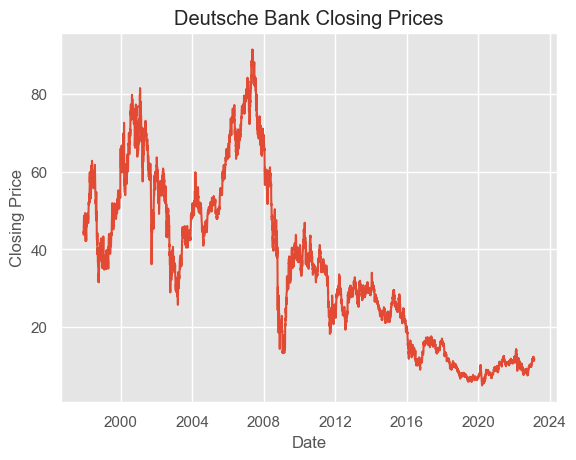

In [397]:
# plot the closing price over time
plt.plot(dbbank_df['Date'], dbbank_df['Close'])
plt.title('Deutsche Bank Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

#### 3. Calculate returns

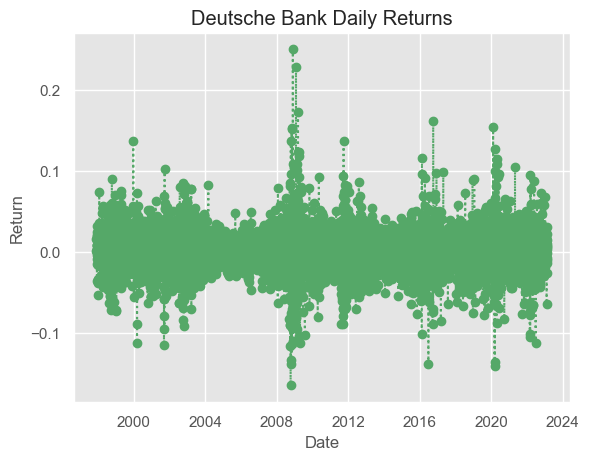

In [398]:
# calculate daily returns
dbbank_df['Return'] = dbbank_df['Close'].pct_change()
# plot the returns over time
plt.plot(dbbank_df['Date'], dbbank_df['Return'], 'go:')
plt.title('Deutsche Bank Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

In the case of the `dbbank_df['Return']` column, `pct_change()` is applied to the `Close` column of the DataFrame, which contains the closing prices of Deutsche Bank's stock. The resulting `Return` column contains the daily percentage changes in the stock price.

#### 4. Analyze relationships between variables
You can use seaborn to create scatter plots and regression plots to explore the relationships between variables. 

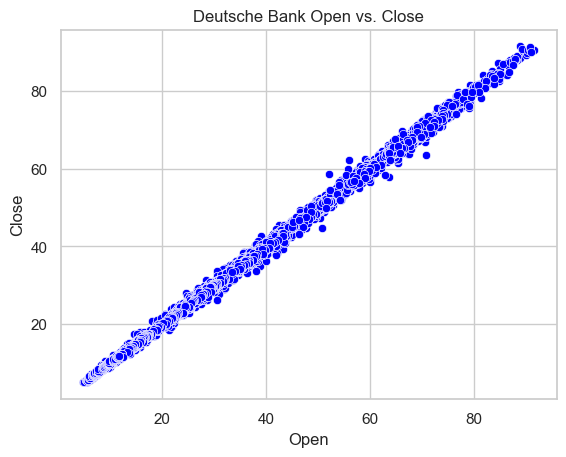

In [399]:
sns.set(style='whitegrid')
# create a scatter plot of Open vs. Close
sns.scatterplot(data=dbbank_df, x='Open', y='Close', color="blue")
plt.title('Deutsche Bank Open vs. Close')
plt.show()

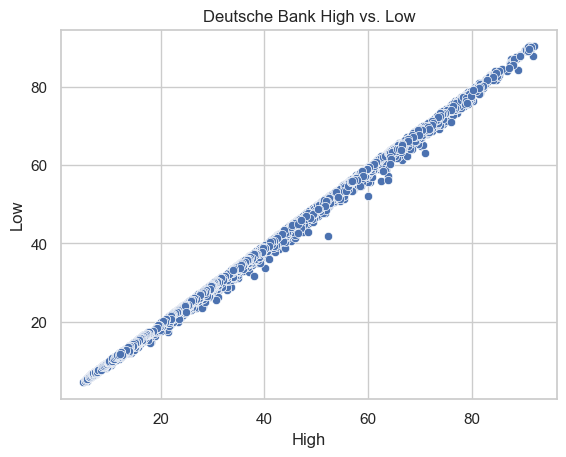

In [401]:
# create a scatter plot of Open vs. Close
sns.scatterplot(data=dbbank_df, x='High', y='Low')
plt.title('Deutsche Bank High vs. Low')
plt.show()

In [402]:
dbbank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume (shares)', 'Return'], dtype='object')

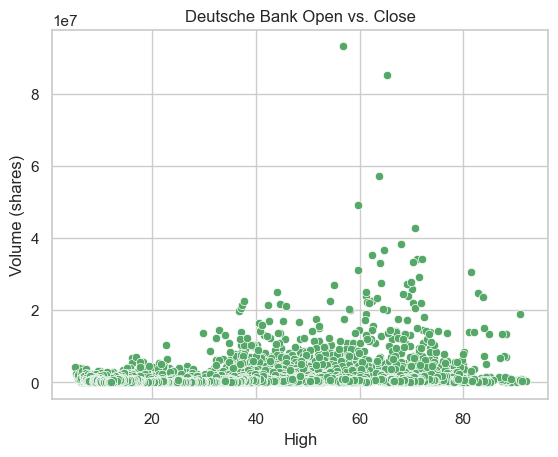

In [403]:
# create a scatter plot of Open vs. Close
sns.scatterplot(data=dbbank_df, x='High', y='Volume (shares)', color="g")
plt.title('Deutsche Bank Open vs. Close')
plt.show()

<AxesSubplot: xlabel='Volume (shares)', ylabel='Return'>

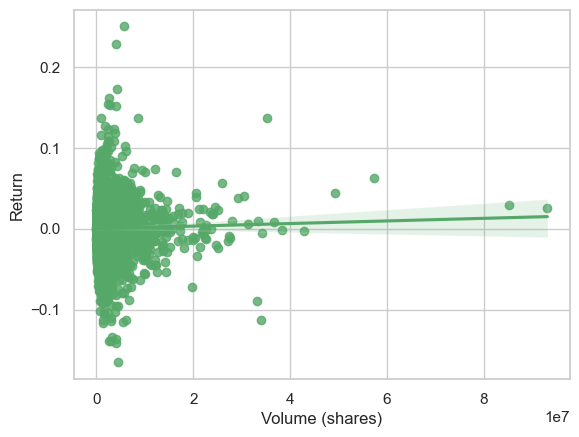

In [404]:
#Scatter Plot with Regression Line using Seaborn
sns.regplot(data=dbbank_df, y='Return', x='Volume (shares)', color = 'g')

**Note:** Regression line: A regression line is an estimate of the line that describes the true, but unknown, linear relationship between the two variables.

Clearly the two variables doesnot show a strong relationship.

<AxesSubplot: xlabel='Volume (shares)', ylabel='High'>

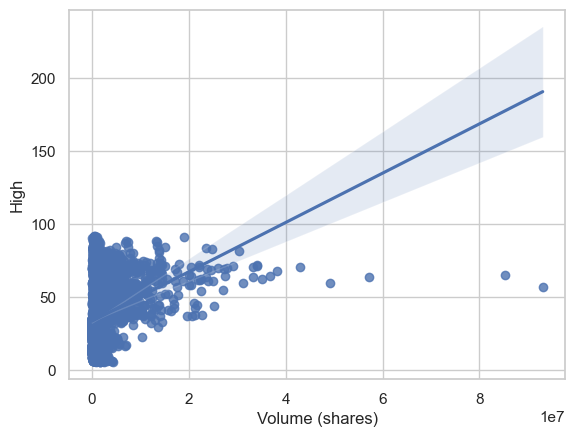

In [405]:
#Scatter Plot with Regression Line using Seaborn
sns.regplot(data=dbbank_df, y='High', x='Volume (shares)')

In this case, we can say that, wheen volume is high, the share prices go high. 

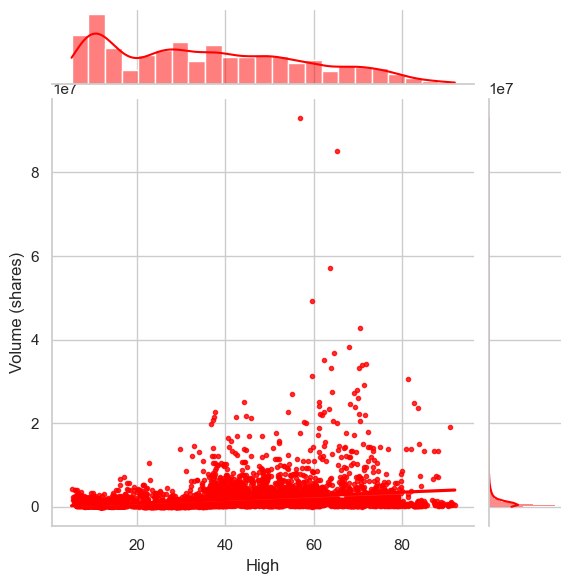

In [406]:
# Scatter Plot with Marginal Histograms along with linear regression
sns.jointplot(data=dbbank_df, x='High', y='Volume (shares)', kind="reg", color='red', marker=".")

**Note:** 

*Marginal distribution:* The marginal distribution of a variable is the probability distribution of that variable alone, ignoring the values of any other variables. For two variables, the marginal distribution of one variable can be obtained by summing the joint probability distribution over all values of the other variable.

> For example, if X and Y are two random variables with joint probability distribution p(X, Y), the marginal distribution of X is given by p(X) = ∑p(X, Y), where the sum is taken over all possible values of Y. Similarly, the marginal distribution of Y can be obtained by summing the joint distribution over all values of X.

> It represents the bi-variate distribution using scatterplot() and the marginal distributions using histplot().

#### 5. Rolling statistics
You can use pandas to calculate rolling statistics such as rolling mean, rolling standard deviation, and rolling correlation.

For example, to calculate the 30-day rolling mean of the closing price:

In [420]:
# Calculate rolling mean with window size 30
rolling_mean = dbbank_df['Close'].rolling(window=30).mean()

# Calculate rolling standard deviation with window size 30
rolling_std = dbbank_df['Close'].rolling(window=30).std()

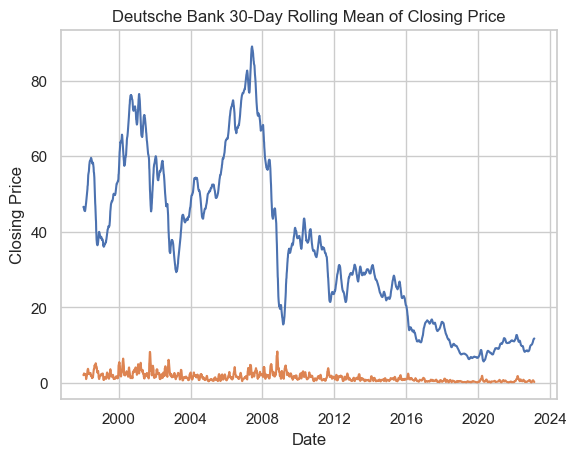

In [421]:
# plot the rolling mean over time
plt.plot(dbbank_df['Date'], rolling_mean)
plt.plot(dbbank_df['Date'], rolling_std)
plt.title('Deutsche Bank 30-Day Rolling Mean of Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

6. **Correlation:**

    To calculate correlations, we need to calculate the shifted value.

    > Shifting the rows in this case can be useful for calculating changes in the 'High' column values between consecutive time periods. By shifting the 'High' column one row downwards, you can compare each value with its previous value and calculate the change.

    > For example, if you subtract the shifted 'High' column from the original 'High' column, you get a new column that contains the difference in 'High' values between each consecutive time period. This can be useful for calculating metrics like daily price changes or volatility.

    > `dbbank_df['high_change'] = dbbank_df['High'] - dbbank_df['High'].shift()`

    > In this code, the shift() method is used to shift the 'High' column one row downwards, so that each value in the 'High' column is now compared with its previous value. Note that the first value in the 'high_change' column will be `NaN`, as there is no previous value to subtract from the first row.

In [409]:
# Create another column with shifted values of 'value' column
dbbank_df['shifted_high'] = dbbank_df['High'].shift()
dbbank_df['shifted_low'] = dbbank_df['Low'].shift()
dbbank_df['shifted_close'] = dbbank_df['Close'].shift()

we notice here that Date is used here as index as well as Column. This is due to the fact that we need some times Date as column.

In [414]:
# Calculate rolling correlation with window size 10
rollinghigh_corr = dbbank_df['High'].rolling(window=10).corr(dbbank_df['shifted_high'])
rollinglow_corr = dbbank_df['Low'].rolling(window=10).corr(dbbank_df['shifted_low'])
rollingClose_corr = dbbank_df['Close'].rolling(window=10).corr(dbbank_df['shifted_close'])

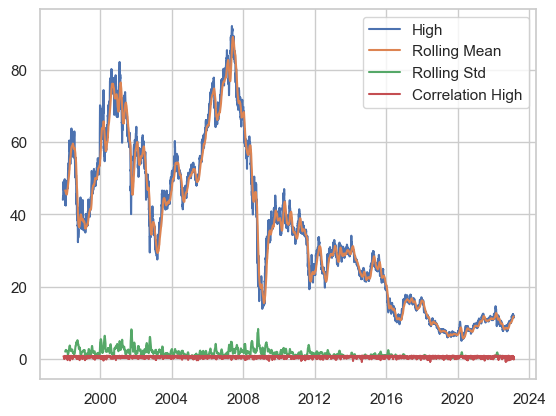

In [423]:
plt.plot(dbbank_df['High'], label='High')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.plot(rollinghigh_corr, label='Correlation High')
plt.legend()
plt.show()

clearly, high value does not correlations show any correlation.

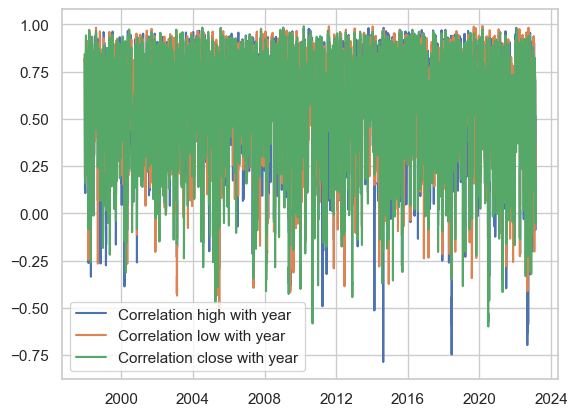

In [416]:
plt.plot(rollinghigh_corr, label='Correlation high with year')
plt.plot(rollinglow_corr, label='Correlation low with year')
plt.plot(rollingClose_corr, label='Correlation close with year')
plt.legend()
plt.show()

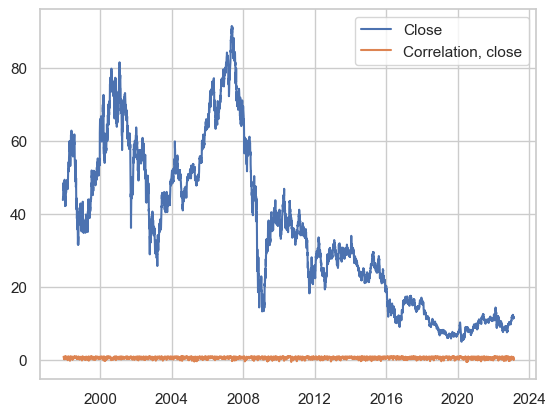

In [417]:
plt.plot(dbbank_df['Close'], label='Close')
plt.plot(rollingClose_corr, label='Correlation, close')
plt.legend()
plt.show()

#### 6. Moving average convergence divergence (MACD)
You can use pandas to calculate the MACD, a popular technical indicator used in trading. For example, to calculate the 12-day and 26-day exponential moving averages and the MACD:

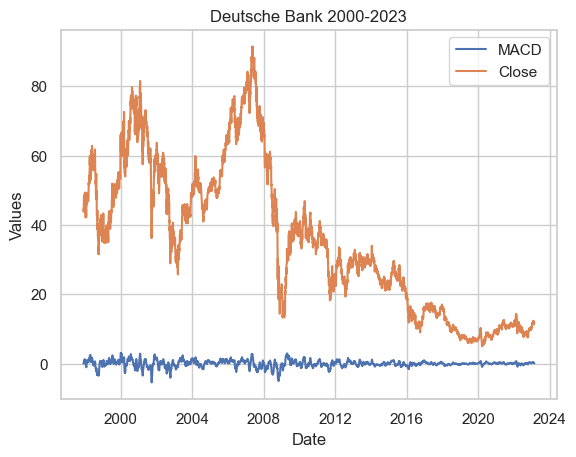

In [430]:
# calculate 12-day and 26-day exponential moving averages
ema12 = dbbank_df['Close'].ewm(span=12, adjust=False).mean()
ema26 = dbbank_df['Close'].ewm(span=26, adjust=False).mean()
# calculate MACD
macd = ema12 - ema26
# plot the MACD over time
plt.plot(dbbank_df['Date'], macd, label = 'MACD')
plt.plot(dbbank_df['Date'], dbbank_df['Close'], label= "Close")
plt.title('Deutsche Bank 2000-2023')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

#### 7. Bollinger Bands
You can use pandas to calculate Bollinger Bands, another popular technical indicator used in trading.

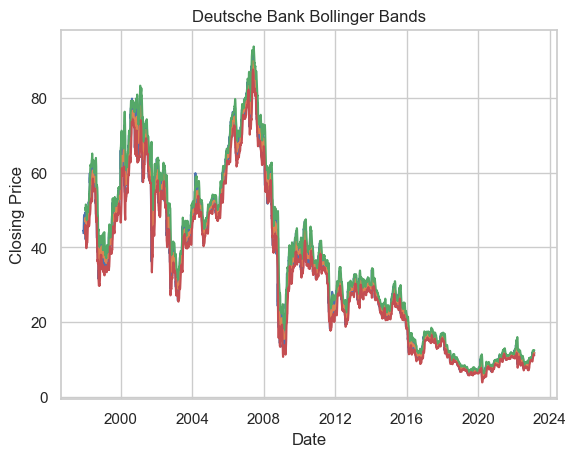

In [431]:
# calculate 20-day moving average and standard deviation
dbbank_df['MA20'] = dbbank_df['Close'].rolling(window=20).mean()
dbbank_df['StdDev'] = dbbank_df['Close'].rolling(window=20).std()
# calculate upper and lower Bollinger Bands
dbbank_df['UpperBand'] = dbbank_df['MA20'] + 2 * dbbank_df['StdDev']
dbbank_df['LowerBand'] = dbbank_df['MA20'] - 2 * dbbank_df['StdDev']
# plot the Bollinger Bands over time
plt.plot(dbbank_df['Date'], dbbank_df['Close'])
plt.plot(dbbank_df['Date'], dbbank_df['MA20'])
plt.plot(dbbank_df['Date'], dbbank_df['UpperBand'])
plt.plot(dbbank_df['Date'], dbbank_df['LowerBand'])
plt.title('Deutsche Bank Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

#### 8. Compare with market indices
You can use pandas to download and compare the Deutsche Bank share data with market indices such as the DAX, FTSE, or S&P 500. For example, to download the DAX data and compare it with the Deutsche Bank share data:

1. aapl_df = apple
2. bac_df = Bank of amerika
3. citi_df = citibank
4. gs_df = Goldman Sachs
5. jpm_df = JPMorgan
6. ms_df = morgan Stanlay

Columns:
Date	| Open	| High	| Low	| Close	| Adj Close	| Volume |

In [443]:
aapl_dfcopy = aapl_df.drop('Adj Close', axis=1)

In [442]:
bac_dfcopy = bac_df.drop('Adj Close', axis=1)

In [444]:
citi_dfcopy = citi_df.drop('Adj Close', axis=1)

In [448]:
gs_dfcopy = gs_df.drop('Adj Close', axis=1)

In [449]:
jpm_dfcopy = jpm_df.drop('Adj Close', axis=1)

In [450]:
ms_dfcopy =ms_df.drop('Adj Close', axis=1)

In [454]:
dbbank_dfnew = dbbank_df.drop(['shifted_high', 'shifted_low', 'shifted_close', 'MA20', 'StdDev', 'UpperBand', 'LowerBand'], axis=1)

In [455]:
merge1_df = pd.concat([dbbank_dfnew, aapl_dfcopy, bac_dfcopy, citi_dfcopy, gs_dfcopy, jpm_dfcopy, ms_dfcopy], axis=1, ignore_index=True)

In [ ]:
start_date = 2006-01-03
end_date = 2023-02-16

In [463]:
merged2_df = dbbank_df.merge(aapl_dfcopy, on='Date', how='left')
merged2_df

ValueError: 'Date' is both an index level and a column label, which is ambiguous.

In [ ]:
df['Returns_DAX'] = dbbank_df['Close_dax'].pct_change()
# plot the daily returns for Deutsche Bank and DAX over time
plt.plot(dbbank_df['Date'], dbbank_df['Returns'], label='Deutsche Bank')
plt.plot(dbbank_df['Date'], dbbank_df['Returns_DAX'], label='DAX')
plt.title('Deutsche Bank vs. DAX Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

```
 # merge DAX data with Deutsche Bank share data
df = pd.merge(dbbank_df, aapl_dfcopy, bac_dfcopy, citi_dfcopy, gs_dfcopy, jpm_dfcopy, ms_dfcopy , on='Date', suffixes=('_db', '_dax'))
# calculate daily returns for DAX
df['Returns_DAX'] = dbbank_df['Close_dax'].pct_change()
# plot the daily returns for Deutsche Bank and DAX over time
plt.plot(dbbank_df['Date'], dbbank_df['Returns'], label='Deutsche Bank')
plt.plot(dbbank_df['Date'], dbbank_df['Returns_DAX'], label='DAX')
plt.title('Deutsche Bank vs. DAX Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

#### 9. Perform statistical analysis
You can use pandas to perform statistical analysis on the Deutsche Bank share data. For example, to calculate the mean, standard deviation, and correlation coefficient of the closing price and volume:

In [434]:
dbbank_df.head()

,Date,Open,High,Low,Close,Volume (shares),Return,shifted_high,shifted_low,shifted_close,MA20,StdDev,UpperBand,LowerBand
Date,,,,,,,,,,,,,,
1997-11-28,1997-11-28,43.93,44.04,43.71,43.79,3196812.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-12-01,1997-12-01,44.53,44.82,44.41,44.49,4185032.0,0.015985,44.04,43.71,43.79,NaN,NaN,NaN,NaN
1997-12-02,1997-12-02,45.01,45.05,44.45,44.53,3881885.0,0.000899,44.82,44.41,44.49,NaN,NaN,NaN,NaN
1997-12-03,1997-12-03,43.89,44.33,43.66,44.33,4823253.0,-0.004491,45.05,44.45,44.53,NaN,NaN,NaN,NaN
1997-12-04,1997-12-04,44.47,44.95,44.10,44.66,4539136.0,0.007444,44.33,43.66,44.33,NaN,NaN,NaN,NaN


In [435]:
# calculate mean, standard deviation, and correlation coefficient of closing price and volume
mean_close = dbbank_df['Close'].mean()
std_close = dbbank_df['Close'].std()
mean_volume = dbbank_df['Volume (shares)'].mean()
std_volume = dbbank_df['Volume (shares)'].std()
corr = dbbank_df['Close'].corr(dbbank_df['Volume (shares)'])
print('Mean closing price:', mean_close)
print('Standard deviation of closing price:', std_close)
print('Mean volume:', mean_volume)
print('Standard deviation of volume:', std_volume)
print('Correlation coefficient of closing price and volume:', corr)

Mean closing price: 35.595854306706265
Standard deviation of closing price: 21.478196596972353
Mean volume: 1602168.8180397062
Standard deviation of volume: 3463011.5526452987
Correlation coefficient of closing price and volume: 0.2670650063238766


## Conclusion

Through data analysis, Deutsche Bank is able to identify potential risks associated with its investment products and take appropriate measures to manage those risks. This helps the bank make informed decisions about which products to invest in and which to avoid, ultimately reducing the overall risk of its investment portfolio.

Extra for future reference

In [ ]:
import yfinance as yf
import pandas as pd

# Set the ticker symbol for Deutsche Bank
tickerdb = 'DB'
tickerbac = 'BAC'

# Download the live share price data for Deutsche Bank
db_stock_data = yf.download([tickerdb,tickerbac], period='1d', interval='1m')

# Download the live share price data for Deutsche Bank
# bac_stock_data = yf.download(tickerbac, period='1d', interval='1m')

# Create a pandas dataframe from the stock data
db_df = pd.DataFrame(db_stock_data)

# Print the dataframe to verify the data has been imported
db_df

**Extra;**

The below code shows how to get data for AAPL from 2016 to 2019 and plot the adjusted closing price of the data.

https://towardsdatascience.com/historical-stock-price-data-in-python-a0b6dc826836

In [ ]:
# Get the data for the stock AAPL
data = yf.download('AAPL','2016-01-01','2019-08-01')

# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()# Get the data for the stock AAPL
data = yf.download('AAPL','2016-01-01','2019-08-01')

# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()

Data for multiple stocks:

In the below code, we will fetch the data of multiple stocks and store it in a dataframe data. Then we will calculate the daily returns and plot the cumulative returns of all the stock prices using matplotlib package.

In [ ]:
tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list,'2015-1-1')['Adj Close']

# Print first 5 rows of the data
print(data.head())

In [ ]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

Minute level data:

Through yfinance, you can also fetch the data of minute frequency. You can download for other frequency by just tweaking the interval parameter on line no 8 below. Following values are supported in the interval: 1m, 5m, 15m, 30m, 60m.

In [ ]:
# Import package
import yfinance as yf

# Get the data
data = yf.download(tickers="MSFT", period="5d", interval="1m")

# Print the data
print(data.tail())

You can analyze this data, create a trading strategy and analyze the performance of the strategy using the pyfolio package. It computes the Sharpe ratio, Sortino ratio, maximum drawdowns and many other metrics.

# Reference

1. https://investor-relations.db.com/share/share-information/historical-share-prices
2. https://www.zaner.com/3.0/education/technicalstudies/MA.asp#top
3. https://www.linkedin.com/pulse/stock-data-analysis-using-python-sakshi-grover/ (have to do some of these)